In [1]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
!pip install awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [3]:
import awswrangler as wr
path = f"s3://source-voltar/source/apple_daily_close.csv"
df=wr.s3.read_csv(path)
df.tail()

,date,open,high,low,close,adjclose,volume,ticker
1816,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,AAPL
1817,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,AAPL
1818,2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,AAPL
1819,2022-09-29,146.100006,146.720001,140.679993,142.479996,142.479996,128138200,AAPL
1820,2022-09-30,141.279999,143.100006,138.000000,138.199997,138.199997,124705400,AAPL


In [29]:
!pip install alpaca-trade-api

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [67]:
#import libraries
import os
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline

In [69]:
# Load .env enviroment variables
load_dotenv()

True

In [70]:
# Set Alpaca API key and secret

#get the base directory
basepath=Path()
basedir=str(basepath.cwd())
#load the environment variables
envars= basepath.cwd() / '.env'
load_dotenv(envars)

# authentication and connection details
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')
base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

In [71]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-07-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-30', tz='America/New_York').isoformat()

In [72]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AAPL"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_monte_carlo = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AAPL = df_monte_carlo[df_monte_carlo['symbol']=='AAPL'].drop('symbol', axis=1)
AAPL.drop(columns=['trade_count', 'vwap'], inplace=True)

# Display sample data
df_stock_data.head()

AAPL                                  
                             open    high     low   close    volume
timestamp                                                          
2015-12-01 05:00:00+00:00  118.73  118.81  116.86  117.34  34852374
2015-12-02 05:00:00+00:00  117.00  118.11  116.08  116.28  33385643
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785
2015-12-04 05:00:00+00:00  115.20  119.25  115.11  119.03  57776977
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754

In [73]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252
)

In [74]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  118.73  118.81  116.86  117.34  34852374   
2015-12-02 05:00:00+00:00  117.00  118.11  116.08  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785   
2015-12-04 05:00:00+00:00  115.20  119.25  115.11  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754   

                                        
                          daily_return  
timestamp                               
2015-12-01 05:00:00+00:00          NaN  
2015-12-02 05:00:00+00:00    -0.009034  
2015-12-03 05:00:00+00:00    -0.009288  
2015-12-04 05:00:00+00:00     0.033247  
2015-12-07 05:00:00+00:00    -0.006301

In [75]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/home/ec2-user/SageMaker/FinTech-Project2/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.039244,0.972277,1.007915,1.035279,1.003568,1.004177,1.000306,1.017570,0.975765,0.998234,...,1.020107,0.994274,1.028856,0.963361,1.008182,1.058771,0.970008,1.016547,1.012026,1.038718
2,1.065845,1.000993,0.960261,1.046598,1.022032,1.007264,1.040236,1.030607,0.989461,1.001473,...,1.017338,0.993563,0.959122,0.955580,1.044833,1.057023,1.005456,0.966568,1.019786,1.058235
3,1.053669,1.015400,0.985507,0.994148,0.980408,1.046675,1.025827,1.050035,1.004457,0.984835,...,1.044079,1.002669,0.953034,0.974938,1.063065,1.056641,0.985462,0.959988,1.025925,1.097444
4,1.074566,0.991104,1.015481,0.986958,1.019609,1.045918,1.011073,1.031126,0.994585,0.978390,...,1.052017,1.005926,0.958216,0.983321,1.033553,1.053841,1.024132,0.956178,1.051486,1.097553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.867343,1.506341,1.059595,1.616372,0.498211,1.600900,1.092740,0.323505,0.570122,0.867294,...,1.417180,1.331572,0.717960,0.668370,0.691341,3.126211,1.667552,1.547113,1.673112,0.645832
249,2.882408,1.499871,1.030182,1.535219,0.486044,1.540493,1.060036,0.322660,0.558628,0.894770,...,1.410753,1.376022,0.708747,0.665196,0.727830,3.179710,1.561426,1.544328,1.737991,0.620928
250,2.934517,1.534986,1.024641,1.542601,0.486587,1.583312,1.071972,0.340433,0.571273,0.875934,...,1.422087,1.393374,0.729983,0.651678,0.719956,3.163226,1.513631,1.521051,1.738232,0.603575
251,3.034854,1.502311,1.058138,1.476500,0.505460,1.640034,1.035896,0.340323,0.547025,0.893172,...,1.477576,1.409480,0.767169,0.656133,0.706604,3.124115,1.496588,1.562014,1.733741,0.621494


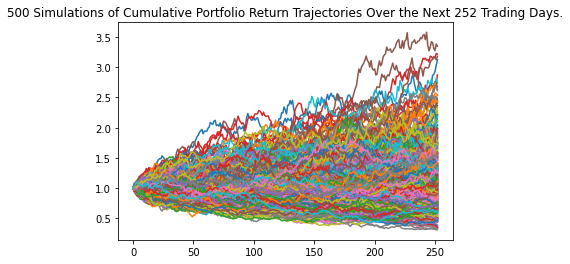

In [82]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
# line_plot.rcParams["figure.figsize"] = (10,8)
# line_plot.tight_layout()
line_plot.get_figure().savefig("plots/MC_thirtyyear_sim_plot_AAPL.png",)